In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import plot, show, savefig, xlim, figure,  ylim, legend, boxplot, setp, axes

In [ ]:
df =  pd.read_csv('raw_data.csv')
df.columns =["start", "total", 'overhead', 'duration']
df.head()

In [3]:
df.shape

(23793, 4)

## Creating new column to filter the change of the number of cars on

In [4]:
df['c'] = df['total'].diff()
df_filtered = df[df['c'] != 0]
df_filtered

,start,total,overhead,duration,c
0,396,400,1.119461,142,NaN
715,199,200,1.426029,106,-200.0
1445,297,300,1.202268,64,100.0
2466,396,400,1.464065,50,100.0
3709,497,500,1.181018,27,100.0
5191,593,600,2.181119,74,100.0
8389,594,500,1.581930,125,-100.0
9977,495,400,2.268378,115,-100.0
11327,397,300,1.967818,223,-100.0
12428,298,200,1.772368,352,-100.0


In [5]:
index_list = df_filtered.index.tolist() # list of the start poisitions of index for change of values 
print(len(index_list))
print(index_list)

18
[0, 715, 1445, 2466, 3709, 5191, 8389, 9977, 11327, 12428, 13983, 14893, 15990, 17275, 20201, 21695, 22815, 23735]


In [6]:
l_mod = index_list + [max(index_list)+1] # creating a list of indexes to iterate over (must have 0 in it)
list_of_dfs = [df.iloc[l_mod[n]:l_mod[n+1]] for n in range(len(l_mod)-1)] # creating a list of dfs for each index

In [26]:
df2, df3, df4,df5,df6 = [], [], [], [],[] # creating new arrays for separate car numbers

In [27]:
for i in list_of_dfs:
    x = i['overhead'].tolist()
    if 200 == i['total'].iloc[0]:
        df2.append(x)
    elif 300 == i['total'].iloc[0]:
        df3.append(x)
    elif 400 == i['total'].iloc[0]:
        df4.append(x)
    elif 500 == i['total'].iloc[0]:
        df5.append(x)
    elif 600 == i['total'].iloc[0]:
        df6.append(x)

In [66]:
df2[2]

[2.1688007071242152]

In [67]:
A = [df2[0], df2[1]]
B = [df3[0], df3[1], df3[2], df3[3]]
C = [df4[0], df4[1], df4[2], df4[3], df4[4]]
D = [df5[0], df5[1], df5[2], df5[3]]
E = [df6[0], df6[1]]

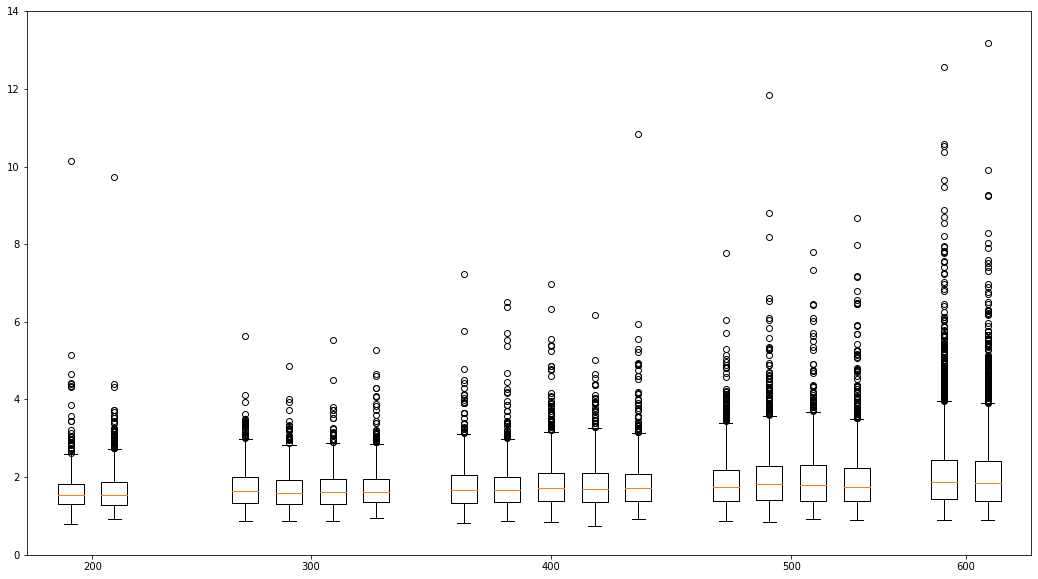

In [73]:
fig = figure(figsize=(18, 10))
ax = axes()
# hold(True)

bp = boxplot(A, positions = [1, 2], widths = 0.6)

bp = boxplot(B, positions = [5, 6, 7, 8], widths = 0.6)

bp = boxplot(C, positions = [10, 11,12,13,14], widths = 0.6)

bp = boxplot(D, positions = [16,17,18,19], widths = 0.6)

bp = boxplot(E, positions = [21, 22], widths = 0.6)


# set axes limits and labels
xlim(0,23)
ylim(0,14)
ax.set_xticklabels(['200', '300', '400', '500', '600'])
ax.set_xticks([1.5, 6.5, 12, 17.5, 21.5])

# draw temporary red and blue lines and use them to create a legend
# hB, = plot([1,1],'b-')
# hR, = plot([1,1],'r-')
# legend((hB, hR),('Apples', 'Oranges'))
# hB.set_visible(False)
# hR.set_visible(False)

savefig('boxcompare.png')
show()